In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder

from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\write\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [6]:
stop_words = set(stopwords.words('english'))
punc = string.punctuation

<Axes: xlabel='count', ylabel='Category'>

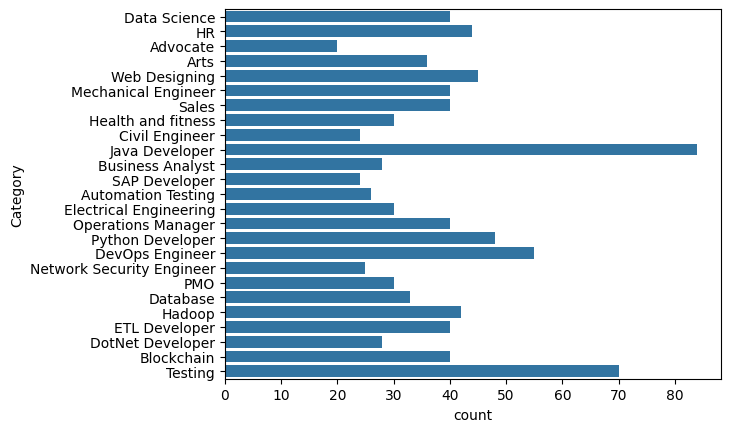

In [7]:
sns.countplot(df['Category'])

In [8]:
counts = df['Category'].value_counts()
label = df['Category'].unique()

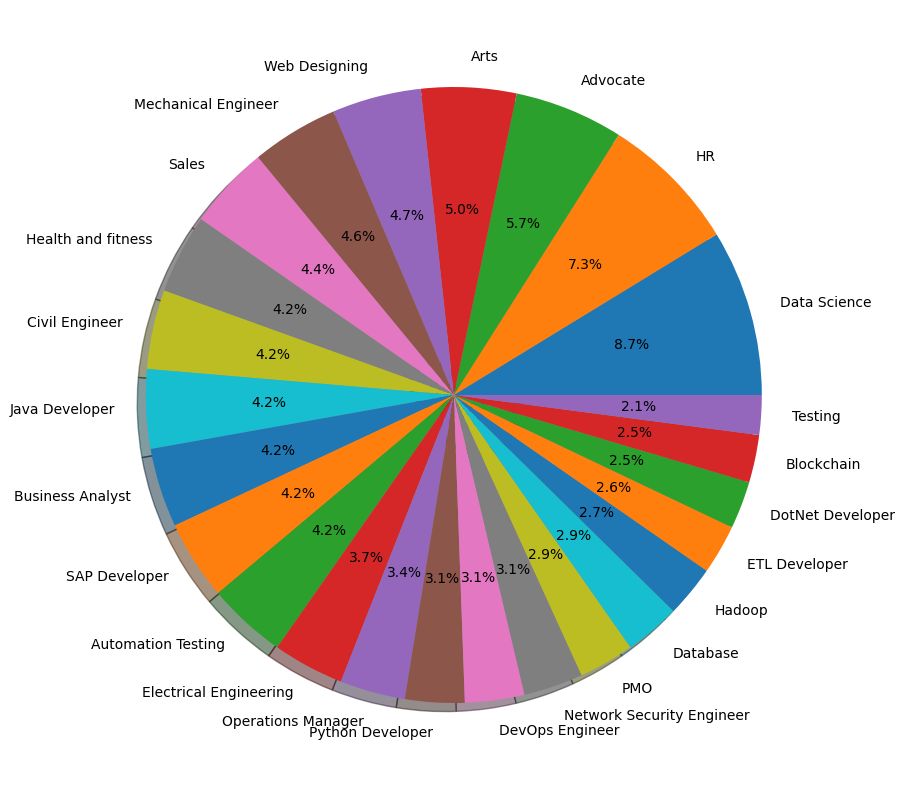

In [9]:
plt.figure(figsize=(15, 10))
plt.pie(counts, labels=label, autopct='%1.1f%%', shadow=True)
plt.show()

# Exploring Resume

In [10]:
df['Category'][0]

'Data Science'

In [11]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Preprocessing

In [12]:
ws = WordNetLemmatizer()

In [13]:
def remove_url(text):
    if isinstance(text, str):  # Check if the input is a string
        pattern = re.compile(r'https?://\S+|www\.\S+')
        return pattern.sub(r'', text)
    return text  # If not a string, return it unchanged

In [14]:
def preprocessing(text):
    # removing urls
    text = remove_url(text)

    # remove html tags
    text = BeautifulSoup(text, 'html.parser')
    text = text.get_text()
    if not text.strip():  # Check if text is empty after stripping HTML
        return 'empty_text'

    text = re.sub(r'@.*$', '', text)

    # tokenizing the text
    text_list = word_tokenize(text)
    if not text_list:  # Check if text is empty after stripping HTML
        return 'empty_text'


    # lowering the words
    for i in range(len(text_list)):
        text_list[i] = text_list[i].lower().strip()

    # removing the stopwords
    filtered_words = []
    for word in text_list:
        if word not in stop_words:
            filtered_words.append(word)

    text_list = filtered_words

    # removing punctuation
    filtered_words = []
    for word in text_list:
        if word not in punc:
            filtered_words.append(word)
    text_list = filtered_words



    # stemming
    for i in range(len(text_list)):
        text_list[i] = text_list[i].replace('ing', '')
        text_list[i] = text_list[i].replace("'s", '')
        text_list[i] = text_list[i].replace("'re", '')
        text_list[i] = text_list[i].replace("'ve", '')
        text_list[i] = text_list[i].replace("'nt", '')
        text_list[i] = ws.lemmatize(text_list[i])

    final_text =  ' '.join(text_list)

    if not final_text.strip():
        return 'empty_text'
    return final_text


### Encoding

In [15]:
df['Resume'] = df['Resume'].apply(preprocessing)

In [16]:
df['Resume'][0]

"skill programm language python panda numpy scipy scikit-learn matplotlib sql java javascript/jquery machine learn regression svm naã¯ve bayes knn random forest decision tree boost technique cluster analysis word embedd sentiment analysis natural language process dimensionality reduction topic modell lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch d3.js dc.js plotly kibana matplotlib ggplot tableau others regular expression html cs angular 6 logstash kafka python flask git docker computer vision open cv understand deep learn.education detail data science assurance associate data science assurance associate ernst young llp skill detail javascript- exprience 24 month jquery- exprience 24 month python- exprience 24 monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accelerat review process run analytics generate report core member

## Label Encoding

In [17]:
le = LabelEncoder()

In [18]:
le.fit(df['Category'])

LabelEncoder()

In [19]:
domains = [df['Category'].unique()]

In [20]:
print(domains)

[array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)]


In [21]:
df['Category'] = le.transform(df['Category'])

In [22]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [23]:
#       ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

## Vectoriztion

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer(max_features=7000)

In [26]:
tfidf.fit(df['Resume'])

TfidfVectorizer(max_features=7000)

In [27]:
resume_transformed = tfidf.fit_transform(df['Resume'])

resume_df = pd.DataFrame(resume_transformed.toarray())

In [28]:
resume_df.shape

(962, 6590)

In [29]:
resume_df.head()

,0,1,2,3,4,5,6,7,8,9,...,6580,6581,6582,6583,6584,6585,6586,6587,6588,6589
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df.drop(columns=['Resume'], inplace=True)

In [31]:
df = pd.concat([df, resume_df], axis=1)

In [32]:
df.shape

(962, 6591)

In [33]:
df

,Category,0,1,2,3,4,5,6,7,8,...,6580,6581,6582,6583,6584,6585,6586,6587,6588,6589
0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
958,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
959,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
960,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(columns=['Category'])
y = df['Category']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,6580,6581,6582,6583,6584,6585,6586,6587,6588,6589
468,0.056018,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
549,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.022057,0.0,...,0.0,0.0,0.0,0.0,0.0,0.018291,0.0,0.0,0.0,0.0
280,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
109,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.089501,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [38]:
X_train.shape

(769, 6590)

In [39]:
y_train.shape

(769,)

In [40]:
y_train.shape

(769,)

### Training Model

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

In [42]:
knc = KNeighborsClassifier()

In [43]:
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = knc.predict(X_test)

In [45]:
accuracy_score(y_pred, y_test)

0.9844559585492227

In [46]:
cross_val_score = cross_val_score(estimator=knc, X=X, y=y, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


In [47]:
np.mean(cross_val_score)

0.9917310996563575

### Exporting Model

In [48]:
import pickle

In [49]:
pickle.dump(knc, open('model.pkl', 'wb'))

In [50]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

In [51]:
pickle.dump(le, open("encoder.pkl",'wb'))